# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [210]:
#импорт библиотеки pandas 
import pandas as pd
#импорт библиотеки matplot
import matplotlib.pyplot as plt

#чтение csv-файла
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Предобработка данных

In [211]:
#вывод первых 10 строк датафрейма
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [212]:
#вывод основной информации о датафрейме 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

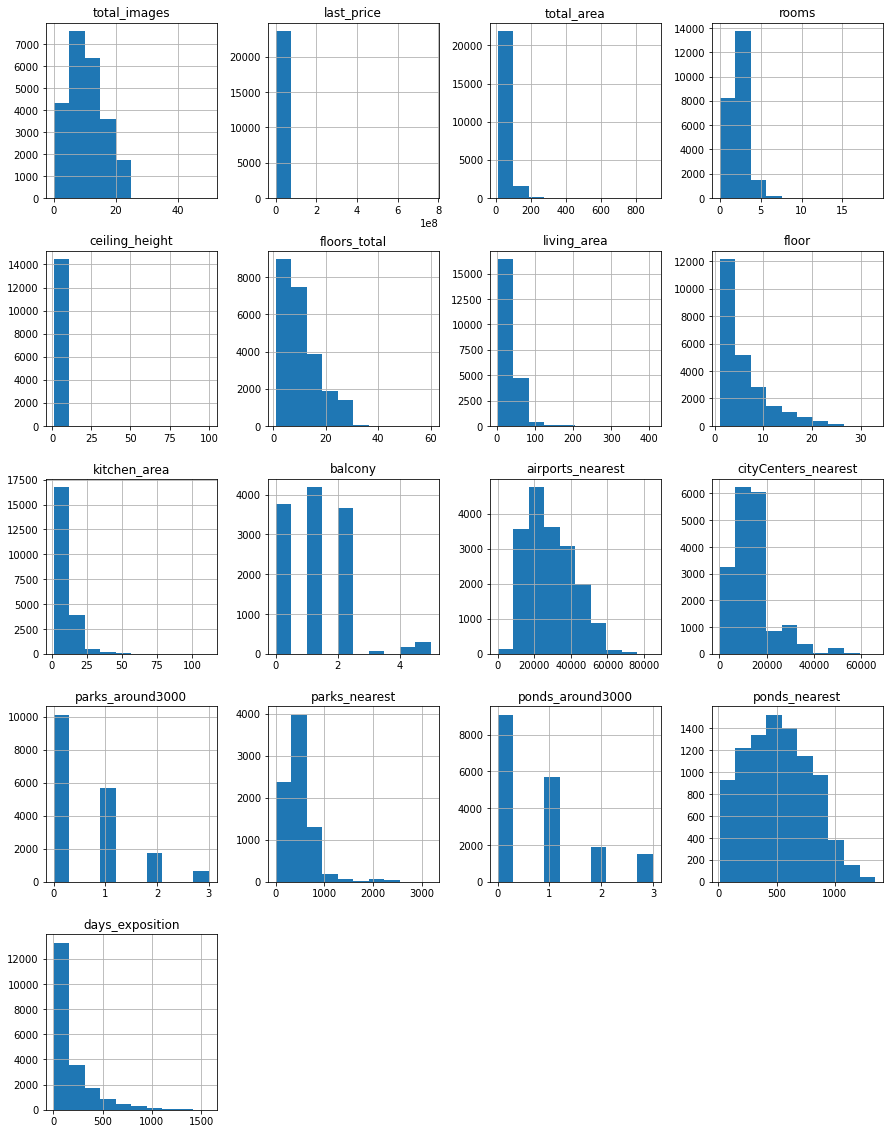

In [213]:
#построение общей гистограммы для всех числовых столбцов датафрейма 
data.hist(figsize=(15, 20))

In [214]:
#вывод количества пропущенных значений для каждого столбца
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [215]:
#проверка датафрейма на наличие явных дубликатов 
data.duplicated().sum()

0

Пояснения: предлагается заменить пропущенные значения в столбце ceiling_height и floors_total медианным значением, а далее устранить выбивающиеся значения, в столбце balcony пропущенные значения заменить на 0, есть вероятность, что в этих квартирах нет балконов, в столбце locality_name пропущенные значения заменим на "неопределены", в столбце park_round3000 также заменим значения на 0, так как возможно в радиусе 3 км нет парков, в столбце ponds_around3000  также заменим значения на 0, так как возможно в радиусе 3 км нет водоемов 

In [216]:
#замена пропущенных значений и вывод количества пропусков 
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


In [217]:
#замена пропущенных значений в столбце ceiling_height и вывод количества пропусков 
median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)
print(data['ceiling_height'].isna().sum())

0


In [218]:
#заполнение пропущенных значений в столбце locality_name и вывод количества пропусков 
data['locality_name'] = data['locality_name'].fillna('undefined')
print(data['locality_name'].isna().sum())

0


In [219]:
#заполнение пропущенных значений в столбце floors_total и вывод количества пропущенных значений 
median_floors_total = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(median_floors_total)
print(data['floors_total'].isna().sum())

0


In [220]:
#устранение пропусков в столбце is_apartment и вывод количества пропущенных значений
data['is_apartment'] = data['is_apartment'].fillna('False')
print(data['is_apartment'].isna().sum())

0


In [221]:
#устранение пропусков в столбце parks_around3000 и вывод количества пропущенных значений
data['parks_around3000'] = data['parks_around3000'].fillna(0)
print(data['parks_around3000'].isna().sum())

0


In [222]:
#устранение пропусков в столбце ponds_around3000 и вывод количества пропущенных значений
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data['ponds_around3000'].isna().sum())

0


In [223]:
#устранение некорректных значений в столбце floors_total
def floors(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor > floors_total:
        return floor
    else:
        return floors_total
data['floors_total'] = data[['floors_total', 'floor']].apply(floors, axis=1)
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8        False  ...   
1            2.65          11.0        18.60      1        False  ...   

In [224]:
#изменение типа данных для столбца total_images 
data['total_images'] = data['total_images'].astype('int')

#изменение типа данных для столбца is_apartament
data['is_apartment'] = data['is_apartment'].astype('bool')

#изменение типа данных для столбца ceiling_height
data['ceiling_height'] = data['ceiling_height'].astype('float')

#приведение столбца first_day_exposition в datatime 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#изменение типа данных для столбца floors_total 
data['floors_total'] = data['floors_total'].astype('int')

#изменение типа данных для столбца rooms
data['rooms'] = data['rooms'].astype('int')

#вывод информации по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Пояснения: total_images приводим к целому числу, is_apartment - приводим к булевому типу данных, celing_height приводим к дробному числу,  first_day_exposition приводим к типа дататайм,  floors_total приводим к целому числу, rooms приводим к целому числу.  
Изменение типов данных обсуловлено для удобства манипуляции с данными и приведением к удобному виду. 

In [225]:
#вывод уникальных значений в столбце locality_name
data['locality_name'].value_counts()

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
посёлок Петро-Славянка         1
посёлок Дзержинского           1
деревня Иссад                  1
деревня Малая Романовка        1
посёлок Сумино                 1
Name: locality_name, Length: 365, dtype: int64

In [226]:
#поиск дубликатов в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [227]:
#устранение неявных дубликатов
def local_name(row):
    if 'Шушары' in row:
        return 'Шушары'
    elif 'Янино-1' in row:
        return 'Янино-1'
    elif 'Парголово' in row:
        return 'Парголово'
    elif 'Мурино' in row:
        return 'Мурино'
    elif 'Кудрово' in row:
        return 'Кудрово'
    elif 'Красный Бор' in row:
        return 'Красный Бор'
    elif 'Фёдоровское' in row:
        return 'Фёдоровское'
    elif 'Новое Девяткино' in row:
        return 'Новое Девяткино'
    elif 'Металлострой' in row:
        return 'Металлострой'
    elif 'Лебяжье' in row:
        return 'Лебяжье'
    elif 'Северский' in row:
        return 'Северский'
    elif 'Молодцово' in row:
        return 'Молодцово'
    elif 'Кузьмоловский' in row:
        return 'Кузьмоловский'
    elif 'Аннино' in row:
        return 'Аннино'
    elif 'Новая Ропша' in row:
        return 'Новая Ропша'
    elif 'Пикколово' in row:
        return 'Пикколово'
    elif 'Куттузи' in row:
        return 'Куттузи'
    elif 'Ефимовский' in row:
        return 'Ефимовский'
    elif 'Плодовое' in row:
        return 'Плодовое'
    elif 'Заклинье' in row:
        return 'Заклинье'
    elif 'Торковичи' in row:
        return 'Торковичи'
    elif 'Первомайское' in row:
        return 'Первомайское'
    elif 'Понтонный' in row:
        return 'Понтонный'
    elif 'Токсово' in row:
        return 'Токсово'
    elif 'Старая Малукса' in row:
        return 'Старая Малукса'
    elif 'Путилово' in row:
        return 'Путилово'
    elif 'Никольское' in row:
        return 'Никольское'
    elif 'Корнево' in row:
        return 'Корнево'
    elif 'Морозова' in row:
        return 'Морозова'
    elif 'Новогорелово' in row:
        return 'Новогорелово'
    elif 'Павлово' in row:
        return 'село Павлово'
    elif 'Победа' in row:
        return 'Победа'
    elif 'Терволово' in row:
        return 'Терволово'
    elif 'Советский' in row:
        return 'Советский'
    elif 'Вырица' in row:
        return 'Вырица'
    elif 'Тельмана' in row:
        return 'Тельмана'
    elif 'Большая Ижора' in row:
        return 'Большая Ижора'
    elif 'Рахья' in row:
        return 'Рахья'
    elif 'Зимитицы' in row:
        return 'Зимитицы'
    elif 'Свердлова' in row:
        return 'Свердлова'
    elif 'Рябово' in row:
        return 'Рябово'
    elif 'Поляны' in row:
        return 'Поляны'
    elif 'Мга' in row:
        return 'Мга'
    elif 'Ильичёво' in row:
        return 'Ильичёво'
    elif 'Гаврилово' in row:
        return 'Гаврилово'
    elif 'Назия' in row:
        return 'Назия'
    elif 'Гарболово' in row:
        return 'Гарболово'
    elif 'Приветнинское' in row:
        return 'Приветнинское'
    elif 'Мельниково' in row:
        return 'Мельниково'
    elif 'Усть-Луга' in row:
        return 'Усть-Луга'
    elif 'Любань' in row:
        return 'Любань'
    elif 'Стеклянный' in row:
        return 'Стеклянный'
    elif 'Форносово' in row:
        return 'Форносово'
    elif 'Сумино' in row:
        return 'Сумино'
    elif 'Возрождение' in row:
        return 'Возрождение'
    elif 'Лисий Нос' in row:
        return 'Лисий Нос'
    elif 'Жилгородок' in row:
        return 'Жилгородок'
    elif 'Громово' in row:
        return 'Громово'
    elif 'Ромашки' in row:
        return 'Ромашки'
    elif 'Кобралово' in row:
        return 'Кобралово'
    elif 'Перово' in row:
        return 'Перово'
    elif 'Пансионат Зелёный Бор' in row:
        return 'Пансионат Зелёный Бор'
    elif 'Свирьстрой' in row:
        return 'Свирьстрой'
    elif 'Репино' in row:
        return 'Репино'
    elif 'Мистолово' in row:
        return 'Мистолово'
    elif 'Левашово' in row:
        return 'Левашово'
    else:
        return row

data['locality_name'] = data['locality_name'].apply(local_name)
print(data['locality_name'].head(10))

0    Санкт-Петербург
1             Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
5            Янино-1
6          Парголово
7    Санкт-Петербург
8             Мурино
9    Санкт-Петербург
Name: locality_name, dtype: object


In [228]:
#проверка выбивающихся значений датафрейма

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<AxesSubplot:>

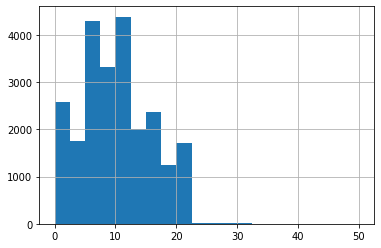

In [229]:
#проверка выбивающихся значений total_images посредством построения гистограммы
data['total_images'].hist(bins = 20)

<AxesSubplot:>

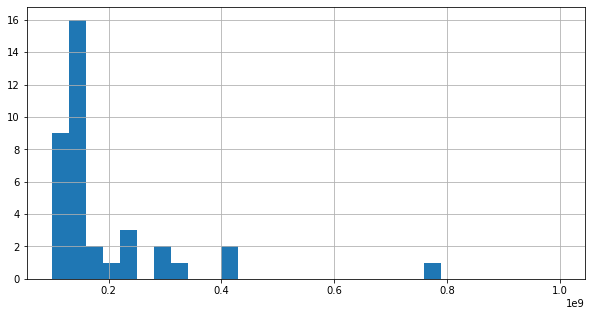

In [230]:
#проверка выбивающихся значений last_price посредством построения гистограмм
data['last_price'].hist(bins=30, range=(100000000, 1000000000), figsize=(10,5))

(-100.0, 1000000000.0)

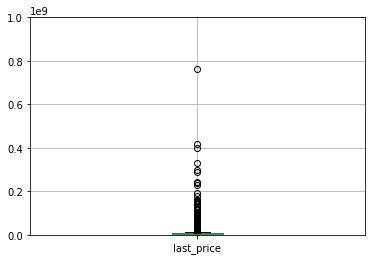

In [231]:
#построение диаграммы размаха для столбца last_price
data.boxplot(column = 'last_price')
plt.ylim(-100, 1000000000)

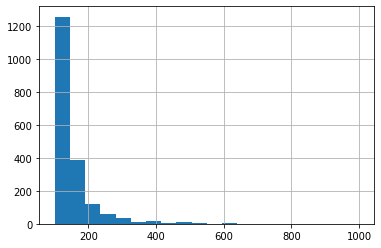

In [232]:
#проверка выбивающихся значений total_area посредством построения гистограммы
data['total_area'].hist(bins=20,  range=(100, 1000))
plt.show()

(-100.0, 1000.0)

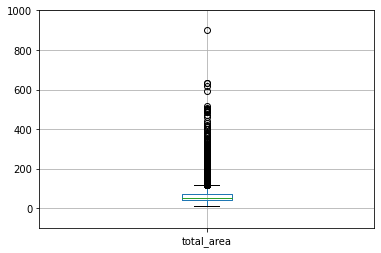

In [233]:
#построение диаграммы размаха для столбца total_area
data.boxplot(column = 'total_area')
plt.ylim(-100, 1000)

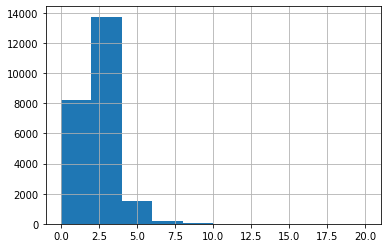

In [234]:
#проверка выбивающихся значений rooms посредством построения гистограммы
data['rooms'].hist(range=(0,20))
plt.show()

(-10.0, 20.0)

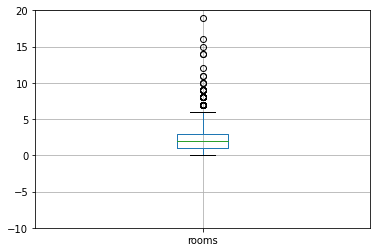

In [235]:
#построение диаграммы размаха для столбца rooms
data.boxplot(column = 'rooms')
plt.ylim(-10, 20)

(0.0, 100.0)

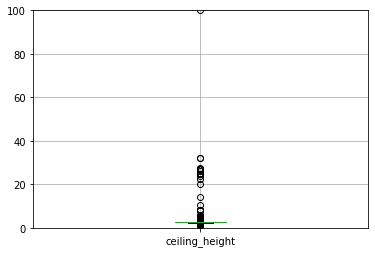

In [236]:
#построение диаграммы размаха для столбца ceiling_height
data.boxplot(column = 'ceiling_height')
plt.ylim(0, 100)

(0.0, 40.0)

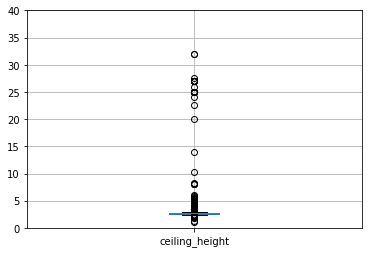

In [237]:
#построение диаграммы размаха для столбца floors_total
data.boxplot(column = 'ceiling_height')
plt.ylim(0, 40)

In [238]:
#проверка выбивайющихся значений 
print(data['total_images'].unique())
print(data['ceiling_height'].unique())
print(data['balcony'].unique())
print(data['total_area'].unique())
print(data['floors_total'].unique())
print(data['rooms'].unique())

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.

In [239]:
#устранение выбивающихся значений столбца total_area
data = data.query('total_area < 200')

Данное значение выбранно по итогам диаграммы размаха, построенного для столбца total_area

In [240]:
#устранение выбивающихся значений столбца rooms
data = data.query('rooms <= 6')

Данное значение выбранно по итогам диаграммы размаха, построенного для столбца rooms 

In [274]:
#устранение выбивающихся значений столбца ceiling_height через создание функции (2.5 м < все потолки > 10)
def ceiling_height(row):
    if row['ceiling_height'] > 10:
        return row['ceiling_height'] * 0.1
    elif row['ceiling_height'] < 2.5:
        return row['ceiling_height'] * 2.5
    else:
        return row['ceiling_height']
data['ceiling_height'] = data.apply(ceiling_height, axis=1)

#вывод уникальных значений столбца ceiling_height
print(data['ceiling_height'].sort_values(ascending = False))

22869    10.0
5863      8.3
3474      8.0
17442     8.0
15743     8.0
         ... 
13775     2.5
13773     2.5
13770     2.5
13766     2.5
23698     2.5
Name: ceiling_height, Length: 22912, dtype: float64


Данное значение выбранно по итогам диаграммы размаха, построенного для столбца ceiling_height 

In [242]:
#устранение выбивающихся значений столбца floors_total
data = data.query('floors_total <= 25')

Данное значение выбранно по итогам диаграммы размаха, построенного для столбца floors_total

In [243]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,9.1,0.0,Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,True,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.0,2018-08-27,2,2.65,5,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


# Вывод по разделу 2: 

Была проведена предобработка данных, выявлены пропущенные значения, а также заполнены пропущенные значения медианами в столбцах ceiling_height, и 0 в столбцах balcony, floors_total, is_apartment, parks_around3000, ponds_around3000, изменены типы данных для удобства вычислений и представления данных, устранены неявные дубликаты в столбце locality_name, а пропуски в данном столбце заменены на "неопределен", по итогам построения диаграмм размаха были устранены выбивающие значения столбцов total_area, rooms, ceiling_height, floors_total. 

### Посчитайте и добавьте в таблицу новые столбцы

In [244]:
#добавление столбца цена за 1 квадратный метр price_area
data['price_area'] = data['last_price'] / data['total_area']
#print(data.head())

#добавление столбца день недели публикации объявления day_publication 
data['day_publication'] = data['first_day_exposition'].dt.weekday
#print(data.head())

#добавление столбца месяц публикации объявления month_publication 
data['month_publication'] = data['first_day_exposition'].dt.month
#print(data.head())

#добавление столбца год публикации объявления year_publication 
data['year_publication'] = data['first_day_exposition'].dt.year
#print(data.head())

#добавление столбца тип этажа квартиры type_floor
def type(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if 2 <= floor <= 24: 
        return 'другой'
    if floor == 25: 
        return 'последний'
data['type_floor'] = data.apply(type, axis=1)
#print(data.head()) 

#добавление столбца расстояние до центра города в километрах cityCenters_nearest_km 
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

#вывод получившегося датафрейма
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.65            11         18.6      1          True  ...   
2            2.65             5         34.3      4          True  ...   
3            2.65            14          NaN      9          True  ...   
4            3.03            14         32.0     13          True  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0               2.0          755.0         

# Вывод по разделу 3:

В датафрейм добавлены новые столбцы: price_area, day_publication, month_publication, year_publication, type_floor, cityCenters_nearest_km.

### Проведите исследовательский анализ данных

In [245]:
#создание нового датафрейма для анализа данных
new_data = data[['total_area','living_area', 'kitchen_area', 'rooms', 'type_floor', 'floors_total', 'cityCenters_nearest','airports_nearest','parks_nearest','day_publication', 'month_publication']].copy()
print(new_data.head(10))

new_data.info()

    total_area  living_area  kitchen_area  rooms type_floor  floors_total  \
0        108.0         51.0          25.0      3     другой            16   
1         40.4         18.6          11.0      1     первый            11   
2         56.0         34.3           8.3      2     другой             5   
3        159.0          NaN           NaN      3     другой            14   
4        100.0         32.0          41.0      2     другой            14   
5         30.4         14.4           9.1      1     другой            12   
7         71.6          NaN          18.9      2     другой            24   
9         61.0         43.6           6.5      3     другой             9   
10        39.6         20.3           8.5      1     другой            12   
11        44.0         31.0           6.0      2     другой             5   

    cityCenters_nearest  airports_nearest  parks_nearest  day_publication  \
0               16028.0           18863.0          482.0                3  

<AxesSubplot:>

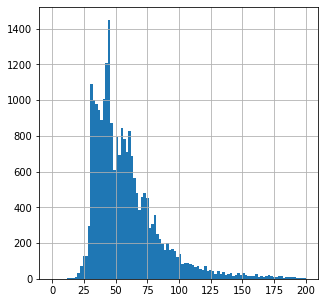

In [246]:
#построение гистограммы для столбца total_area нового датафрейма new_data
new_data['total_area'].hist(range = (0, 200), bins = 100, figsize=(5, 5))

Вывод: основной диапазон площадей квартир варьируется в промежутке от 15 кв.м до 100 кв.м.

<AxesSubplot:>

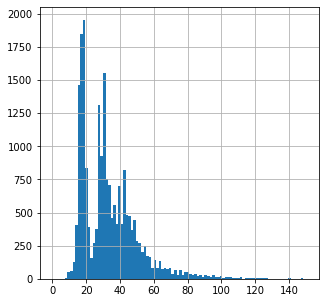

In [247]:
#построение гистограммы для столбца living_area нового датафрейма new_data
new_data['living_area'].hist(range = (0, 150), bins = 100, figsize=(5, 5))

Вывод: основной диапазон жилой площади квартир варьируется в промежутке от 15 кв.м до 125-130 кв.м.

<AxesSubplot:>

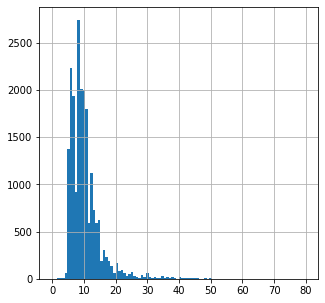

In [248]:
#построение гистограммы для столбца kitchen_area нового датафрейма new_data
new_data['kitchen_area'].hist(range = (0, 80), bins = 100, figsize=(5, 5))

Вывод: основной диапазон кухонной площади квартир варьируется в промежутке от 3 кв.м до 55 кв.м.

<AxesSubplot:>

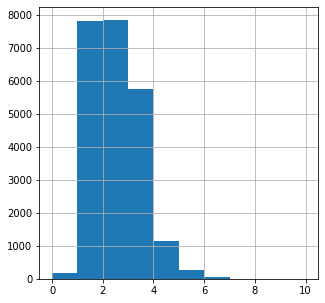

In [249]:
#построение гистограммы для столбца rooms нового датафрейма new_data
new_data['rooms'].hist(range = (0, 10), bins = 10, figsize=(5, 5))

Вывод: основной диапазон количества комнат квартир варьируется в промежутке от 1 до 7. 

<AxesSubplot:>

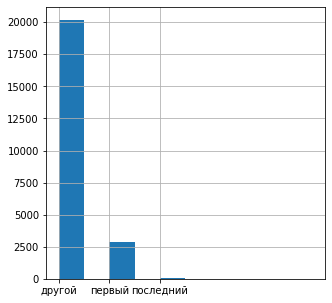

In [250]:
#построение гистограммы для столбца type_floor нового датафрейма new_data
new_data['type_floor'].hist(range = (0, 5), bins = 10, figsize=(5, 5))

Вывод: большое количество опубликованных квартир имеют этаж, отличный от первого и последнего, затем по количеству опубликованных объявлений лидируют квартиры, находящиеся на первом этаже, далее - на последнем. 

<AxesSubplot:>

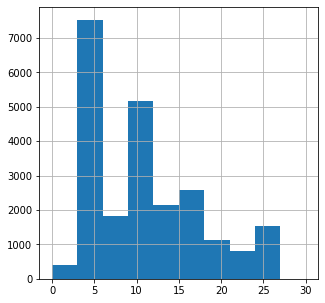

In [251]:
#построение гистограммы для столбца floors_total нового датафрейма new_data
new_data['floors_total'].hist(range = (0, 30), bins = 10, figsize=(5, 5))

Вывод: основной диапазон количества этажей в доме варьируется в промежутке от 1 до 30. 

<AxesSubplot:>

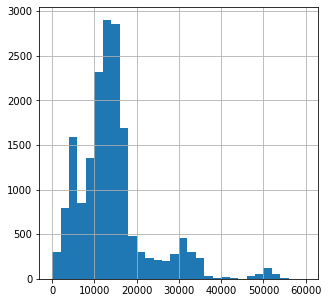

In [252]:
#построение гистограммы для столбца cityCenters_nearest нового датафрейма new_data
new_data['cityCenters_nearest'].hist(range = (0, 60000), bins = 30, figsize=(5, 5))

Вывод: основное количество опубликованных квартир имеют удаленность от центра в промежутке от 0 до 25.000 м. 

<AxesSubplot:>

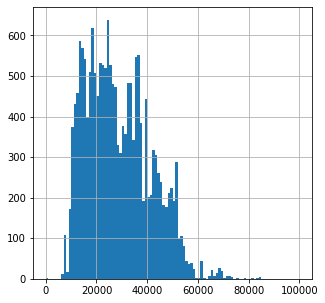

In [253]:
#построение гистограммы для столбца airports_nearest нового датафрейма new_data
new_data['airports_nearest'].hist(range = (0, 100000), bins = 100, figsize=(5, 5))

Вывод: основное количество опубликованных квартир имеют удаленность от аэропорта в промежутке от 15.000 до 58.000 м. 

<AxesSubplot:>

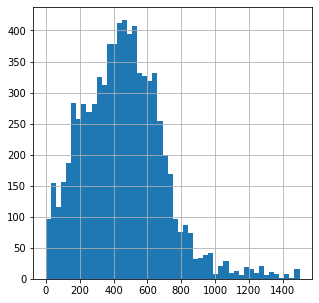

In [254]:
#построение гистограммы для столбца parks_nearest нового датафрейма new_data
new_data['parks_nearest'].hist(range = (0, 1500), bins = 50, figsize=(5, 5))

Вывод: основное количество опубликованных квартир имеют удаленность от парков в пределах 1.000 м. 

<AxesSubplot:>

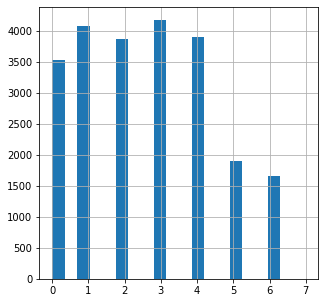

In [255]:
#построение гистограммы для столбца day_publication нового датафрейма new_data
new_data['day_publication'].hist(range = (0, 7), bins = 20, figsize=(5, 5))

Вывод: объявления о продаже квартир публикуются на постоянной основе, меньше всего публикаций - суббота и воскресенье, т.к выходные дни.  

<AxesSubplot:>

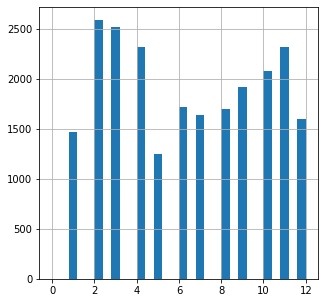

In [256]:
#построение гистограммы для столбца month_publication нового датафрейма new_data
new_data['month_publication'].hist(range = (0, 12), bins = 30, figsize=(5, 5))

Вывод: объявления о продаже квартир публикуются на постоянной основе, больше всего публикаций приходится на февраль, март, апрель, ноябрь месяц, меньше всего публикаций в январе, мае, декабре, что может быть вызвано праздничными днями, отпусками.

# Выполнение задания "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление."

<AxesSubplot:>

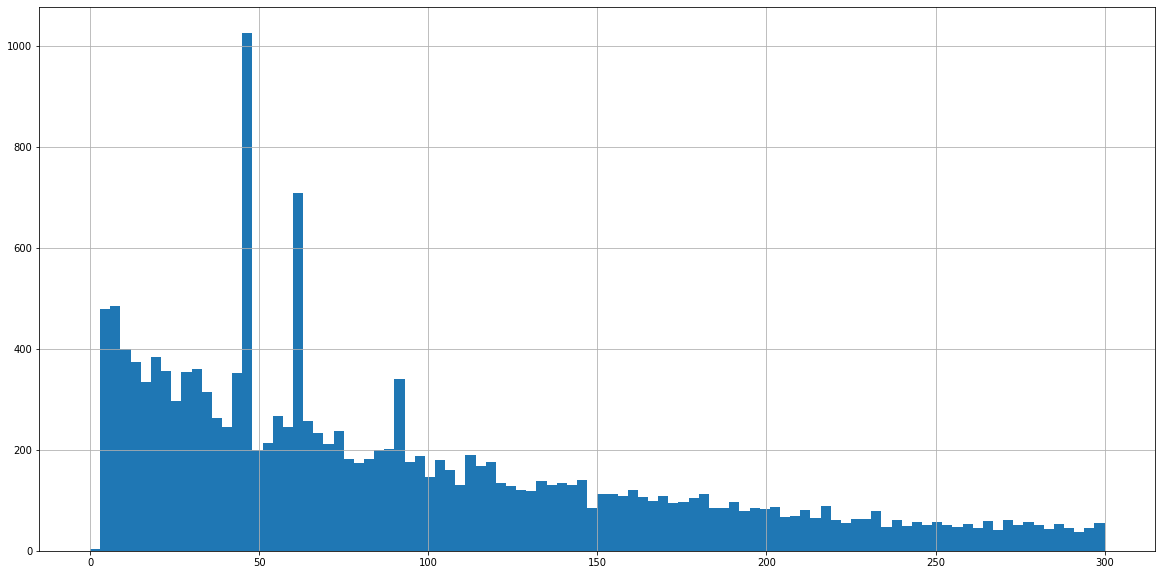

In [257]:
#построение гистограммы для столбца days_exposition
data['days_exposition'].hist(range = (0, 300), bins = 100, figsize=(20, 10))

In [258]:
#подсчет метрик для столбца days_exposition
print('Среднее количество дней продажи', round(data['days_exposition'].mean()))
print('Медиана количества дней продажи', round(data['days_exposition'].median()))

Среднее количество дней продажи 180
Медиана количества дней продажи 95


# Вывод: 
Среднее время продажи квартиры составляет до 100 дней. 
Быстрой продажей можно считать квартиры, которые были проданы менее, чем 50 дней. Долгой продажей можно считать квартиры, которые были проданы более, чем 300 дней. 

# Выполнение задания "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"

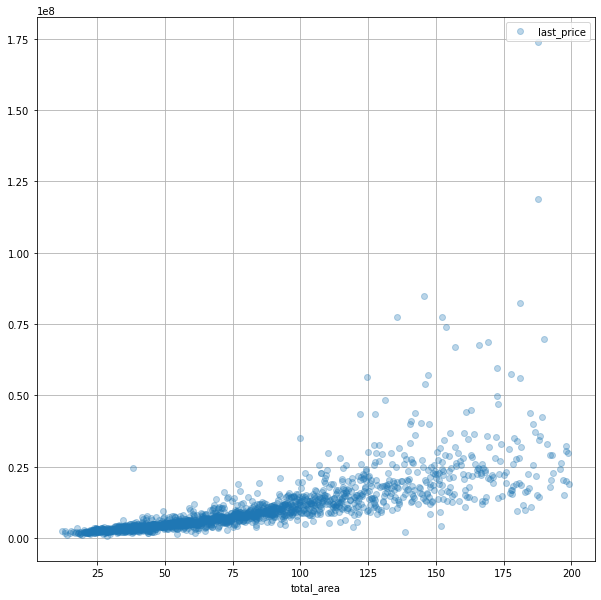

Зависимость общей стоимости от общей площади 0.6569848932463875


In [259]:
#зависимость общей стоимости объекта от общей площади помещения 
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 10), alpha = 0.3)
)
plt.show()
print('Зависимость общей стоимости от общей площади', data['last_price'].corr(data['total_area']))

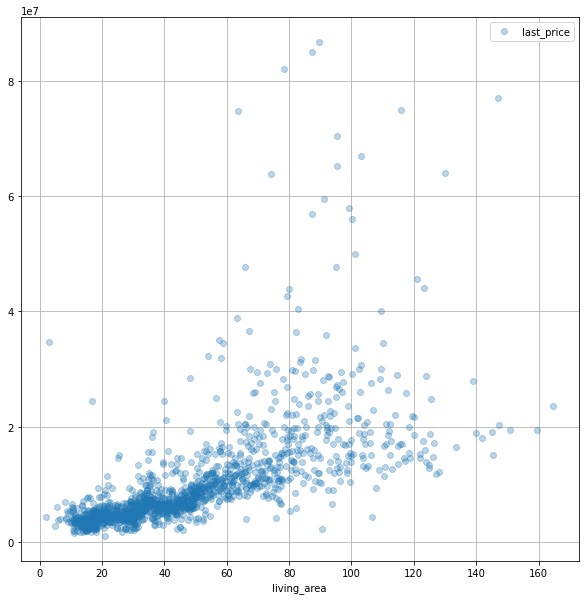

Зависимость общей стоимости от жилой площади 0.5378680018491871


In [260]:
#зависимость общей стоимости объекта от жилой площади помещения 
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 10), alpha = 0.3)
)
plt.show()
print('Зависимость общей стоимости от жилой площади', data['last_price'].corr(data['living_area']))

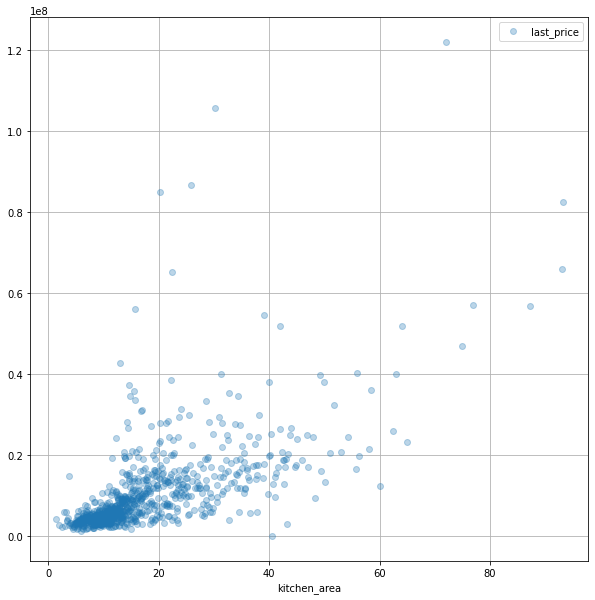

Зависимость общей стоимости от кухонной площади 0.5204755425701953


In [261]:
#зависимость общей стоимости объекта от размера кухонной площади  
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 10), alpha = 0.3)
)
plt.show()
print('Зависимость общей стоимости от кухонной площади', data['last_price'].corr(data['kitchen_area']))

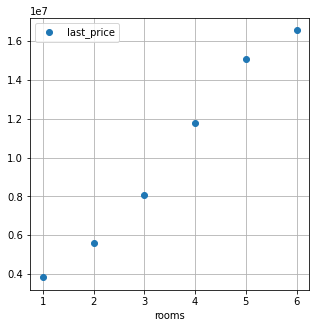

Зависимость общей стоимости от количества комнат 0.3718198622619011


In [262]:
#зависимость общей стоимости объекта от количества комнат  
data = data.query('rooms > 0')
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Зависимость общей стоимости от количества комнат', data['last_price'].corr(data['rooms']))

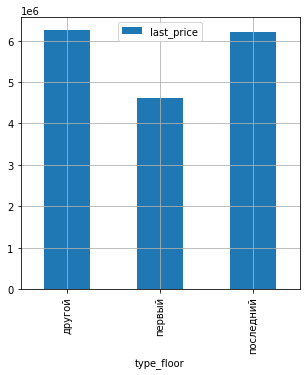

In [263]:
#зависимость общей стоимости объекта от типа этажа
(
    data.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, kind='bar', figsize=(5, 5))
)
plt.show()

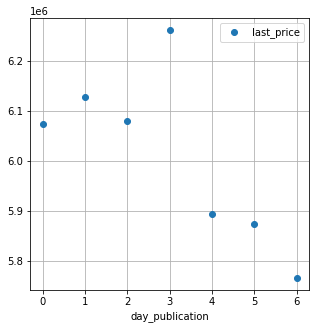

In [264]:
#зависимость общей стоимости объекта от дня публикации
(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

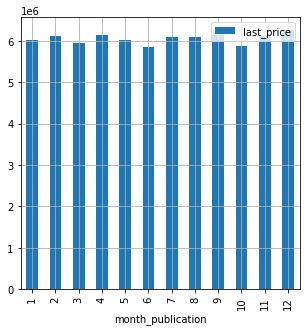

In [265]:
#зависимость общей стоимости объекта от месяца публикации
(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, kind='bar', figsize=(5, 5))
)
plt.show()

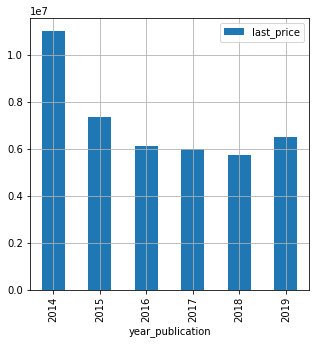

In [266]:
#зависимость общей стоимости объекта от года публикации
(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, kind='bar', figsize=(5, 5))
)
plt.show()

# Вывод: 
Зависимость между общей стоимостью объекта от общей площади объекта составляет: 66%
Зависимость между общей стоимостью объекта от жилой площади объекта составляет: 54%
Зависимость между общей стоимостью объекта от размера кухонной площади объекта составляет: 52%
Зависимость между общей стоимостью объекта от количества комнат объекта составляет: 37%
Зависимость между типом этажа и стоимостью объекта: квартиры с типом этажа "другой" и "последний" дороже. 
Зависимости между общей стоимостью объекта от дня публикации нет. 
Зависимости между общей стоимостью объекта от месяца публикации нет. 
Зависимость между общей стоимостью объекта от года публикации: с 2015 по 2018 идет спад стоимости квартир, в 2019 квартиры начинают снова повышаться в цене.

# Выполнение задания "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений."

In [267]:
#выявление топ 10 локаций с наибольшим количеством объявлений 
last_price_10 = data['locality_name'].value_counts()
print(last_price_10.head(10))

Санкт-Петербург    15247
Мурино               480
Кудрово              450
Шушары               432
Всеволожск           392
Пушкин               364
Колпино              337
Гатчина              307
Выборг               237
Парголово            202
Name: locality_name, dtype: int64


In [272]:
#нахождение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
last_price_10 = data['locality_name'].value_counts().head(10)
last_price_10 = data.query('locality_name in @last_price_10.index').pivot_table(values='price_area', index='locality_name')
last_price_10.sort_values('price_area', ascending=False)

,price_area
locality_name,
Санкт-Петербург,113463.480887
Пушкин,103122.538840
Кудрово,95173.854772
Парголово,86021.402416
Мурино,85527.745082
Шушары,78613.541810
Колпино,75333.295801
Гатчина,68746.146763
Всеволожск,68618.013712


# Вывод: 
Населенные пункты с самым дорогим квадратным метром: Санкт-Петербург, Пушкин, Кудрово, Парголово, Мурино, Шушары, Колпино, Гатчина, Всеволожск, Выборг.

# Выполнение задания "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра"

In [269]:
#добавление столбца цена за 1 метр до центра Санкт-Петербурга price_km
data['price_km'] = data['last_price'] / data['cityCenters_nearest_km']
print(data['price_km'].head())

0    8.125000e+05
1    1.763158e+05
2    3.711429e+05
3    9.271429e+06
4    1.250000e+06
Name: price_km, dtype: float64


In [270]:
#создание датафрейма по средней стоимости каждого километра расстояния до центра в Санкт-Петербурге 
price_km = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
)

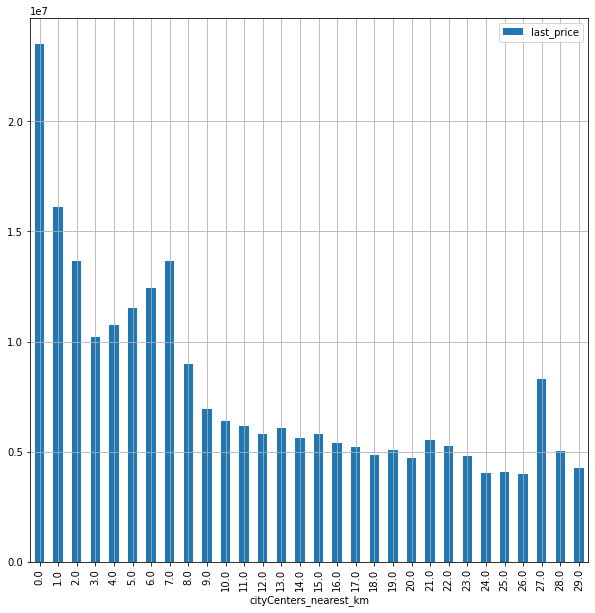

In [271]:
#построение графика 
price_km.plot(grid=True, kind='bar', figsize=(10, 10))
plt.show()

# Вывод: 
Исходя из графика, можно сделать вывод, что стоимость квартир с удаленностью до 2 км от центра самая дорогая. Наиболее низкая стоимость квартир прослеживается с удаленностью от 10 км. 
Также большой скачок можно проследить с удаленность 27 км, это может быть обусловлено продажей недвижимости в элитном районе. 

### Общий вывод:
В результате выполнения проекта проанализированы данные сервиса Яндекс.Недвижимость (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет). Проведена предобработка данных (определены пропущенные значения, заполнены пропущенные значения, изменены типы данных, устранены неявные дубликаты, устранены редкие и выбивающиеся значения). Проведен исследовательский анализ данных (создан новый датафрейм, построены гистрограммы). 
По выполненным заданиям: быстрой продажей недвижимости можно считать объекты, проданные менее, чем 50 дней, долгой продажей можно считать квартиры, которые были проданы более, чем 300 дней; основой фактор, влияющий на стоимость квартир - общая площадь; стоимость квартир с удаленностью до 2 км от центра самая дорогая, наиболее низкая стоимость квартир прослеживается с удаленностью от 10 км. 